note that this notebook can be viewed as a slideshow triggered by: File -> Download as -> Reveal.js slides (.html)

# PySDM tutorial: Coalescence
### authors: see [github.com/atmos-cloud-sim-uj](https://github.com/atmos-cloud-sim-uj/PySDM/graphs/contributors)
### copyright: Jagiellonian University
#### tutorial licence: CC-BY
#### tutorial files: [github.com/atmos-cloud-sim-uj/PySDM/tree/master/PySDM_tutorials](https://github.com/atmos-cloud-sim-uj/PySDM/tree/master/PySDM_tutorials)

### Smoluchowski coagulation equation

<br>
\begin{eqnarray}
\frac{d}{dt}{c_i} = \frac{1}{2} \sum\limits_{k=1}^{i-1} a_{k, i-k} c_k c_{i-k} - \sum\limits_{k=1}^{\infty} a_{k, i} c_k c_i
\end{eqnarray}

where $a_{i,k}$ is a so-called kernel defining rate of collisions and $c_i$ is the number concentration (in a volume of air) of the particles with volume $i \cdot \Delta v$ where $\Delta v$ is a droplet volume increment.

Note that $c_i$ will correspond to super-droplet multiplicity $n^{[i]}$ (in a unit volume of air) if:
- $v^{[i]} = i \cdot \Delta v$,
- $v^{[i]}$ does not change in time.

### Smoluchowski equation: example

\begin{eqnarray}
\frac{d}{dt}{c_i} = \frac{1}{2} \sum\limits_{k=1}^{i-1} a_{k, i-k} c_k c_{i-k} - \sum\limits_{k=1}^{\infty} a_{k, i} c_k c_i
\end{eqnarray}

In [1]:
def smoluchowski(c, a, dt):
    dc = [0]*len(c)
    for i in range(len(c)):
        dc[i] = (
            1/2 * sum([a[k][i-k-1] * c[k] * c[i-k-1] for k in range(i)]) 
                - sum([a[k][i]     * c[k] * c[i]     for k in range(len(c))])
        )
    for i in range(len(c)):
        c[i] += dc[i] * dt 

In [14]:
import matplotlib.pyplot as plt
fig = None

def plot(c, column):
    global fig, axs
    if fig is None:
        fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)
    axs[column].bar(range(1, len(c)+1), c)
    axs[column].set_xlabel('$i$').set_fontsize(15)
    axs[column].set_ylabel('$c_i$').set_fontsize(15)
    axs[column].set_xticks([1,2,3])


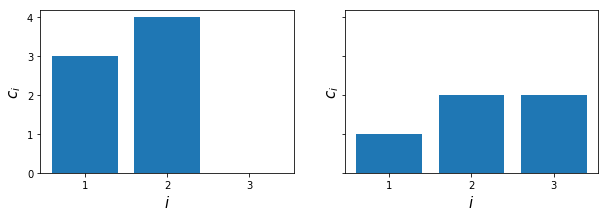

In [15]:
c = [3,4,0]
a = [[0,   1/6, 0], 
     [1/6, 0,   0], 
     [0,   0,   0]]

plot(c, 0)
smoluchowski(c, a, dt=1)
plot(c, 1)

### Smoluchowski equation: challenges

- lack of analytical solutions for physical kernels
- challenges with numerical solutions:
  - distinguishing particles of same $v^{[i]}$ but different attributes (curse of dimensionality) 
  - $v^{[i]} : [0, T] \rightarrow \mathcal{R}$ (due to processes other than coalescence)
  - increasing number of super-particles needed to represent outcomes of collisions

### Monte-Carlo alternative to Smoluchowski's eq.
| &nbsp; | <span style="font-size:1.5em;"><br><br><center>Smoluchowski (deterministic)</center><br>&nbsp;</span>| <span style="font-size:1.5em;"><br><br><center>SDM (stochastic)</center><br>&nbsp;</span> |
|------------------|-----------------------|--------------------|
|<span style="font-size:1.5em;font-weight:bold;"><br>considered pairs<br>&nbsp;</span> | <span style="font-size:1.5em;">all (i,j) pairs</span> | <span style="font-size:1.5em;">random set of N/2 non-overlapping pairs, <br> probability upscaled by $n^2/2$ to $n/2$ ratio</span>     |
|<span style="font-size:1.5em;font-weight:bold;"><br>comp. complexity<br>&nbsp;</span>  | <span style="font-size:1.5em;">$O(n^2)$</span>                | <span style="font-size:1.5em;">$O(n)$</span>               |
|<span style="font-size:1.5em;font-weight:bold;"><br>collisions<br>&nbsp;</span>        | <span style="font-size:1.5em;">colliding a fraction of $n^{[i]}$, $n^{[j]}$</span> | <span style="font-size:1.5em;">collide all of min{$n^{[i]}$, $n^{[j]}$} (all or nothing)</span> |
|<span style="font-size:1.5em;font-weight:bold;"><br>collisions triggered<br>&nbsp;</span> | <span style="font-size:1.5em;">every timestep</span> | <span style="font-size:1.5em;">by comparing probability with a random number</span> |

### The super-droplet method (Shima et al. 2009, Fig. 1)
<img src="https://raw.githubusercontent.com/atmos-cloud-sim-uj/PySDM/master/PySDM_tutorials/pics/Shima_et_al_2009_Fig_1.png" width="500">

### SDM vs. Golovin's analytic solution (Shima et al. 2009, Fig. 2a)
<img src="https://raw.githubusercontent.com/atmos-cloud-sim-uj/PySDM/master/PySDM_tutorials/pics/Shima_et_al_2009_Fig_2a.png" width="500">
See <a href="../PySDM_examples/Shima_et_al_2009_Fig_2/demo.ipynb">demo</a>